<a href="https://colab.research.google.com/github/Joe270585/Calculo_Metricas_Avaliacao_Aprendizado/blob/main/Calculo_Metricas_Avaliacao_Aprendizagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [8]:
    pip install tensorflow scikit-learn numpy matplotlib

In [2]:
# 1. Carregar o dataset MNIST (como exemplo)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Pré-processamento dos dados
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Normalização
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0    # Normalização
y_train_categorico = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorico = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 2. Definir um modelo simples
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
model.fit(x_train, y_train_categorico, epochs=3, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9013 - loss: 0.3438 - val_accuracy: 0.9773 - val_loss: 0.0733
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9816 - loss: 0.0604 - val_accuracy: 0.9852 - val_loss: 0.0515
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9901 - loss: 0.0330 - val_accuracy: 0.9791 - val_loss: 0.0679


In [4]:
# 3. Fazer previsões no conjunto de teste
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Converter probabilidades para classes previstas

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Matriz de Confusão:
 [[ 972    2    1    0    0    1    2    1    1    0]
 [   0 1131    2    0    0    0    0    2    0    0]
 [   2    1 1017    0    1    0    0    9    2    0]
 [   0    0    3 1001    0    4    0    1    1    0]
 [   0    3    1    0  974    0    1    1    0    2]
 [   0    0    0    6    0  884    2    0    0    0]
 [   5    3    0    0    1    7  941    0    1    0]
 [   1    0    6    1    0    0    0 1020    0    0]
 [   5    2   21    6    3   20    1    8  902    6]
 [   3    5    2    5    9    5    0   22    1  957]]


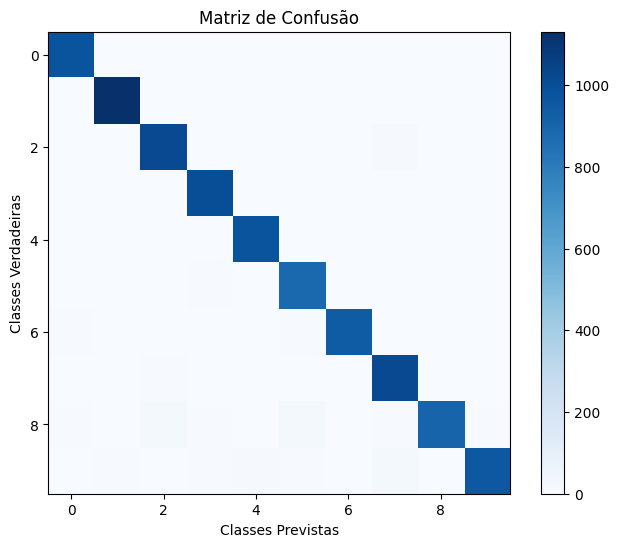

In [5]:
# 4. Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", cm)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.colorbar()
plt.xlabel("Classes Previstas")
plt.ylabel("Classes Verdadeiras")
plt.show()

In [6]:
# 5. Calcular métricas (para problema binário ou generalizar para cada classe)
# Exemplo para uma classe específica (binário):
# Suponha que estamos interessados na classe "1"
TP = cm[1, 1]
TN = np.sum(cm) - (np.sum(cm[1, :]) + np.sum(cm[:, 1]) - TP)
FP = np.sum(cm[:, 1]) - TP
FN = np.sum(cm[1, :]) - TP

accuracy = (TP + TN) / np.sum(cm)
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Acurácia: {accuracy:.2f}")
print(f"Recall (Sensibilidade): {recall:.2f}")
print(f"Especificidade: {specificity:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"F-Score: {f_score:.2f}")

Acurácia: 1.00
Recall (Sensibilidade): 1.00
Especificidade: 1.00
Precisão: 0.99
F-Score: 0.99


In [7]:
# 6. Relatório de classificação completo (multiclasse)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.96      0.99      0.98      1028
           8       0.99      0.93      0.96       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

